In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from utils.imread_rgb import imread_rgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from feature_extractors.hog_extractor import extract_hog_features

In [18]:
vehicle_files = glob.glob('vehicles/*/*.png')
non_vehicle_files = glob.glob('non-vehicles/*/*.png')

In [19]:
colorspace = 'RGB' 
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'

In [20]:
vehicle_features = []
for im_file in vehicle_files:
    image = imread_rgb(im_file)
    vehicle_features.append(extract_hog_features(image, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel))

In [21]:
non_vehicle_features = []
for im_file in non_vehicle_files:
    image = imread_rgb(im_file)
    non_vehicle_features.append(extract_hog_features(image, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel))

In [22]:
X = np.vstack((vehicle_features, non_vehicle_features)).astype(np.float64)

In [23]:
X_scalar = StandardScaler().fit(X)

In [24]:
scaled_X = X_scalar.transform(X)

In [25]:
y = np.hstack((np.ones(len(vehicle_features)), np.zeros(len(non_vehicle_features))))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2)

In [27]:
from sklearn.svm import LinearSVC

In [28]:
svc = LinearSVC()

In [29]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [30]:
from sklearn.metrics import classification_report

In [31]:
y_pred = svc.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97      1818
        1.0       0.98      0.96      0.97      1734

avg / total       0.97      0.97      0.97      3552



In [52]:
from sklearn.externals import joblib
joblib.dump(svc, 'svc_rgb_hog_all_clf.pkl') 
joblib.dump(X_scalar, 'svc_rgb_hog_all_scaler.pkl')

['svc_rgb_hog_all_scaler.pkl']

In [55]:
clf = joblib.load('svc_rgb_hog_all_clf.pkl')

In [61]:
scaler = joblib.load('svc_rgb_hog_all_scaler.pkl')

In [57]:
im = imread_rgb(non_vehicle_files[0])

In [58]:
features = extract_hog_features(im, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)

In [59]:
%matplotlib inline

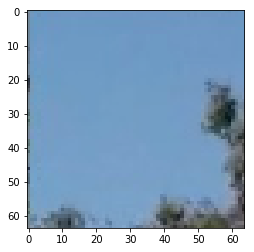

In [60]:
plt.imshow(im)

In [63]:
clf.predict([scaler.transform(features)])

/Users/adit_biswas/anaconda/envs/deep_shelf/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([ 0.])